# 1 Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 2 Data

In [2]:
df= pd.read_csv("auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


## 2.1 Brief Explanation of the Data:

MPG (Miles Per Gallon): This is the target variable or dependent variable. It represents the fuel efficiency of the car in miles per gallon, which is a measure of how many miles the car can travel per gallon of fuel.

Cylinders: The number of cylinders in the car's engine. It can be a categorical variable, typically taking values like 3, 4, 6, or 8.

Displacement: This is the engine displacement, typically measured in cubic inches (CID). It's a measure of the engine's size or volume.

Horsepower: The power of the car's engine, typically measured in horsepower (HP).

Weight: The weight of the car in pounds (lbs).

Acceleration: The time it takes for the car to accelerate from 0 to 60 miles per hour (mph), measured in seconds.

Model Year: The year when the car model was manufactured, represented as a two-digit or four-digit year.

Origin: The origin or manufacturing country of the car. It's often a categorical variable, with values like 1 for USA, 2 for Europe, and 3 for Asia.

Car Name: The name or label of the car model. This column may contain various text information, which is typically not used in modeling and can be considered as an identifier.

# 3. Basic Data Overview

In [3]:
df.shape

(398, 9)

In [4]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [5]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


# 4. Basic Data Visualization

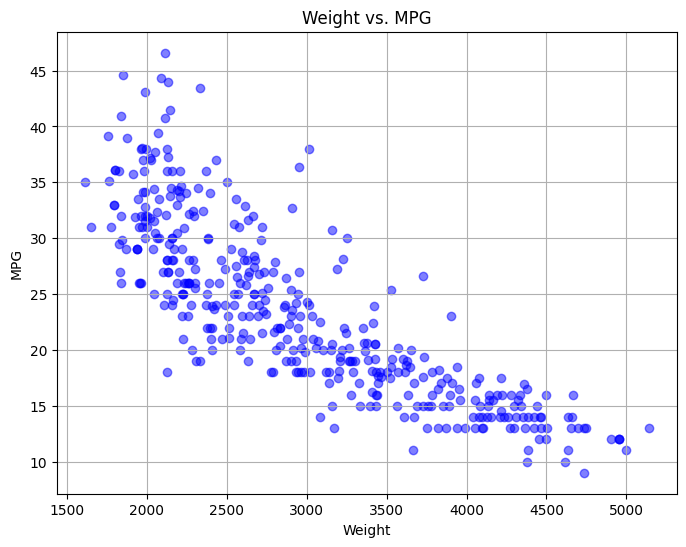

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(df['weight'], df['mpg'], c='blue', alpha=0.5)

plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Weight vs. MPG')

plt.grid(True)
plt.show()

# 5.Data Splitting

In [8]:
X = df['weight'].values.reshape(-1, 1)
Y = df['mpg']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# 6.Linear Regression Model Training and Evaluation

In [10]:
model = LinearRegression()
model.fit(X_train,y_train)
r2=model.score(X_test,y_test)
print("R-squared:", r2)

R-squared: 0.722971057303075


In [11]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-0.00780524]
Intercept: 46.78206336645047


# 7.Regression Result Visualization

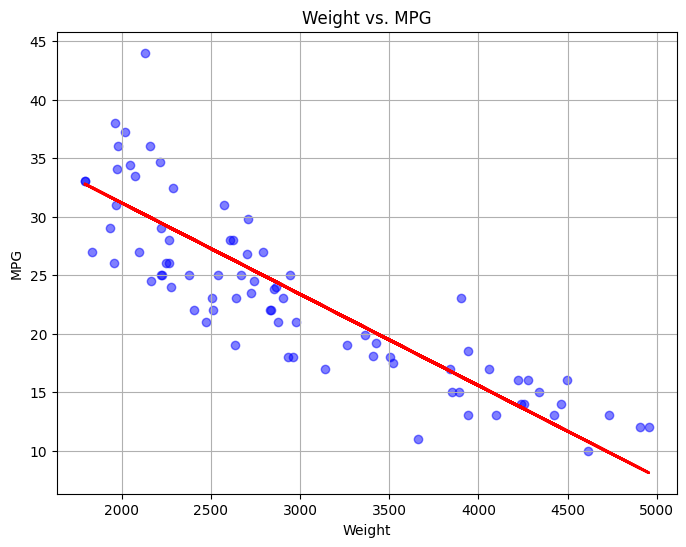

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, c='blue', alpha=0.5)
plt.plot(X_test, model.predict(X_test), color='red', linewidth=2)

plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Weight vs. MPG')

plt.grid(True)

plt.savefig('line.png', format='png')

plt.show()


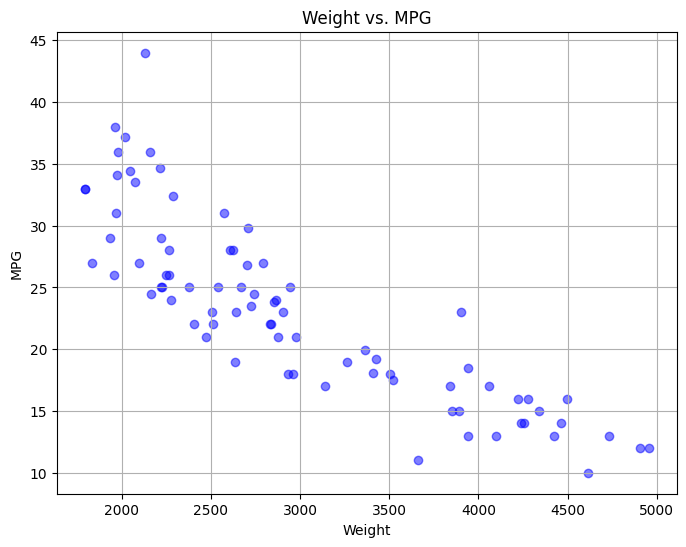

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, c='blue', alpha=0.5)

plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Weight vs. MPG')

plt.grid(True)

plt.savefig('no line.png', format='png')

plt.show()

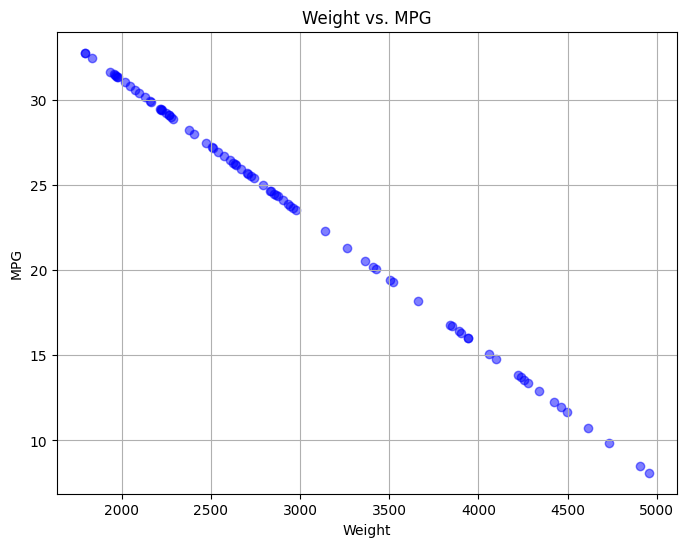

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, model.predict(X_test), c='blue', alpha=0.5)

plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Weight vs. MPG')

plt.grid(True)
plt.show()


# 8. Saving The Model

In [15]:
import joblib

joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']